Персонализация предложений постоянным клиентам
=

## Описание проекта :


Интернет-магазин «В один клик» продаёт разные товары: **для детей, для дома, мелкую бытовую технику, косметику и даже продукты.** Отчёт магазина за прошлый период показал, что **активность покупателей начала снижаться.** Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — **удерживать активность постоянных клиентов.** Сделать это можно с помощью **персонализированных предложений.**

### Цель проекта 

Разработать решение, которое позволит **персонализировать предложения постоянным клиентам**, чтобы увеличить их покупательскую активность.

### Задача проекта 
   1. Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
   2. Нужно собрать данные по клиентам по следующим группам:
        * Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
        * Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
        * Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
        * Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.
        * Представим группы признаков (вместе с целевым) в виде диаграммы — такую визуализацию ещё называют диаграммой Исикавы.


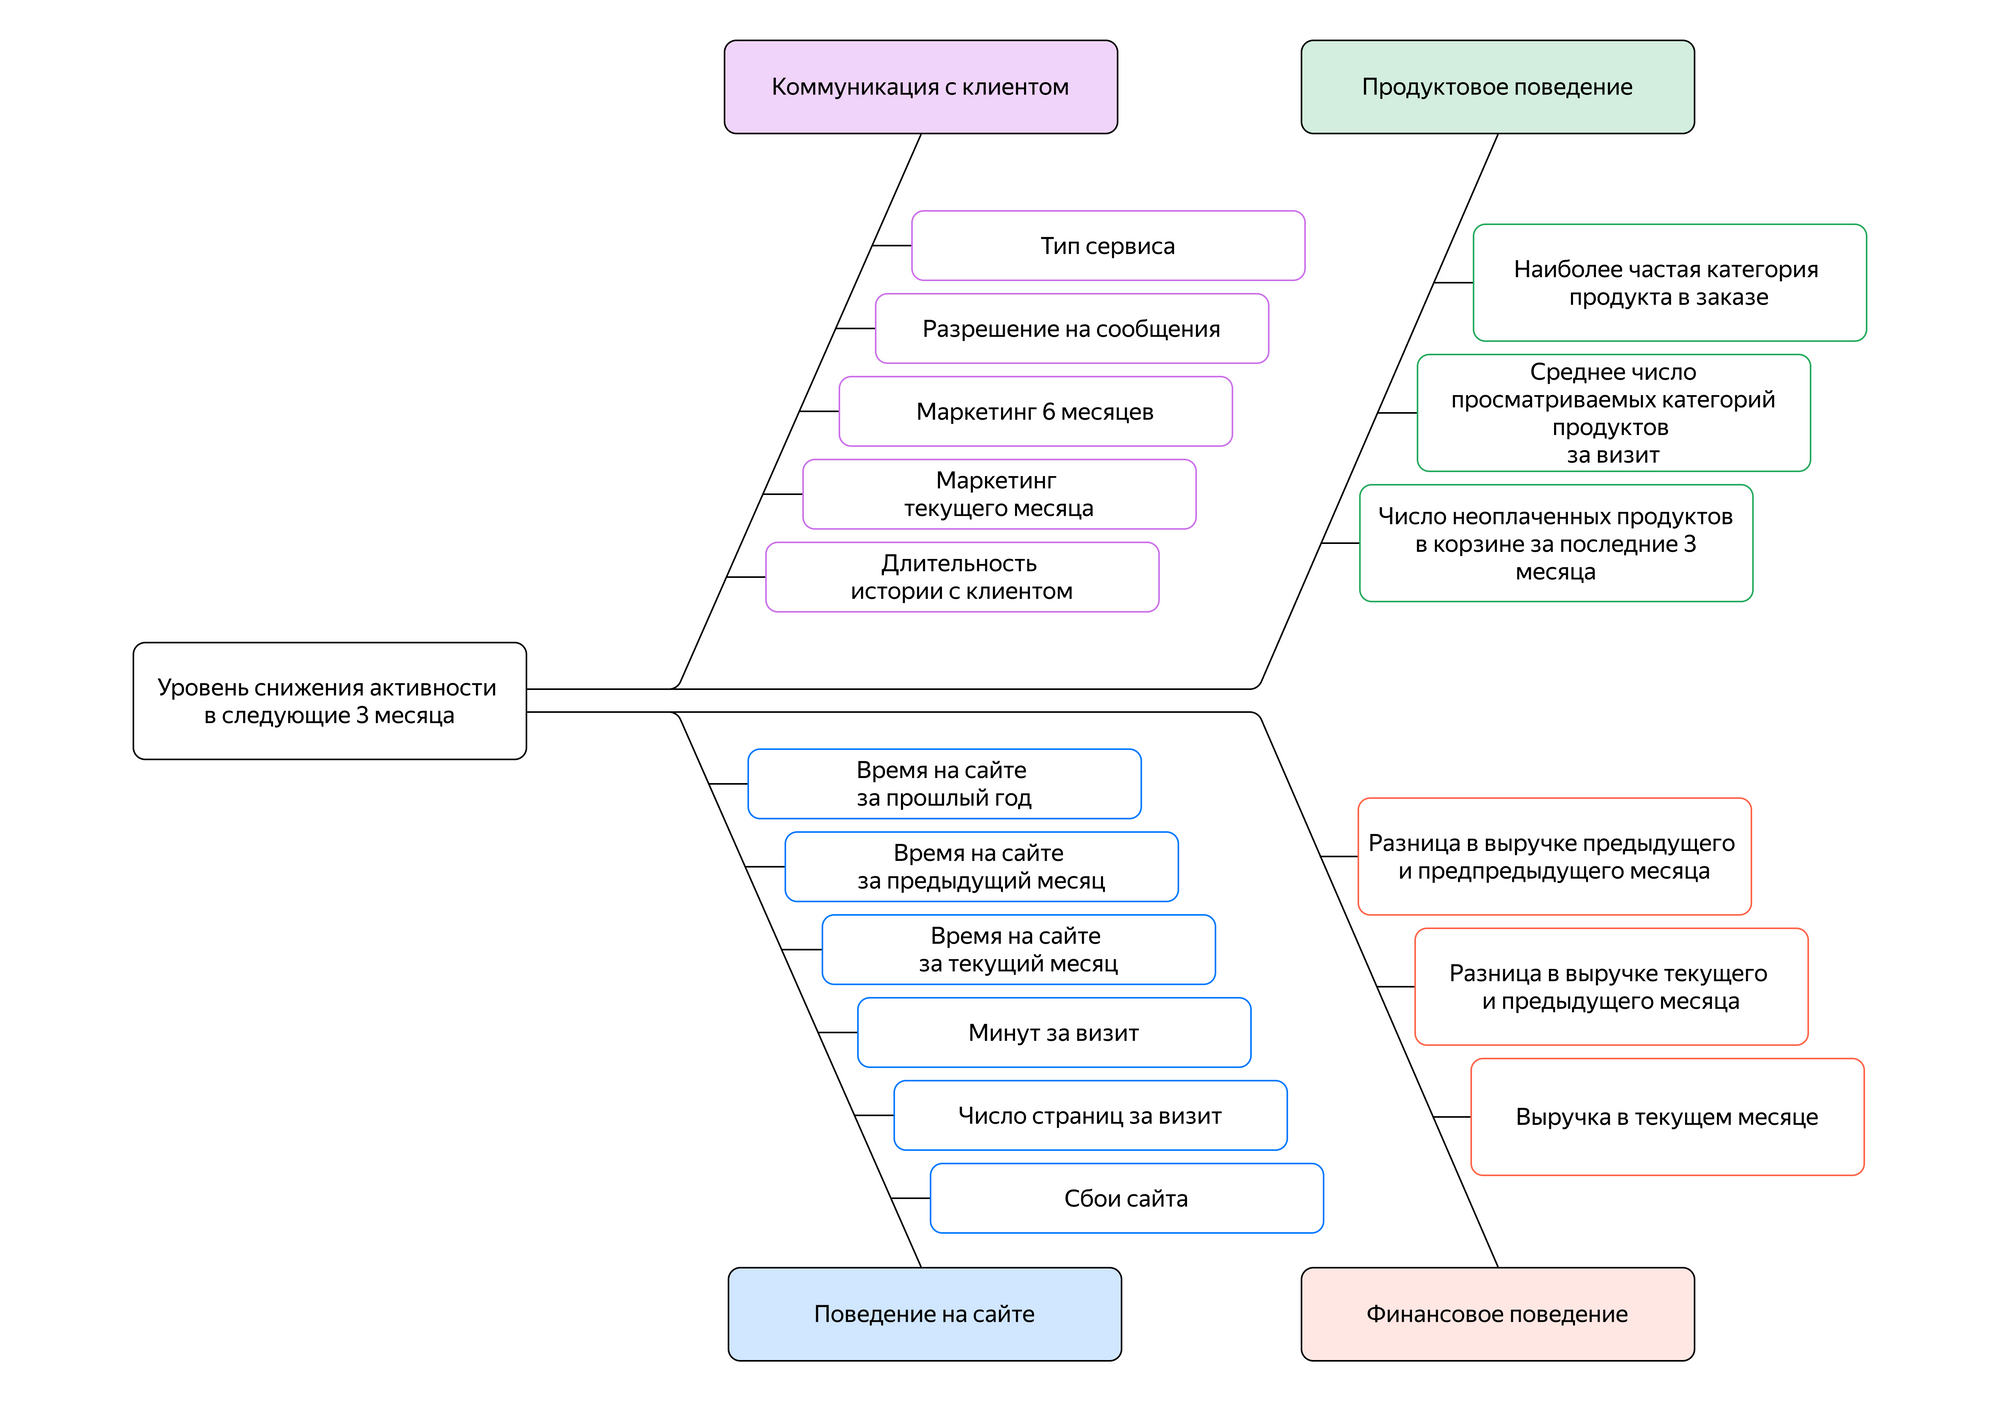


На диаграмме входные признаки объединены в четыре группы: **коммуникация с клиентом, продуктовое поведение, поведение на сайте и финансовое поведение**.

   3. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
   4. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
   5. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

### Количество датасетов (их описаниие): 
1. **market_file.csv** - содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
2. **market_money.csv** - данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом
3. **market_time.csv** - данные о времени (в минутах), которое покупатель провёл на сайте в течение периода.
4. **money.csv** - данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

### Признаки market_file.csv:

* **id** — номер покупателя в корпоративной базе данных.
* **Покупательская активность** — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
* **Тип сервиса** — уровень сервиса, например «премиум» и «стандарт».
* **Разрешить сообщать** — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
* **Маркет_актив_6_мес** — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
* **Маркет_актив_тек_мес** — количество маркетинговых коммуникаций в текущем месяце.
* **Длительность** — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
* **Акционные_покупки** — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
* **Популярная_категория** — самая популярная категория товаров у покупателя за последние 6 месяцев.
* **Средний_просмотр_категорий_за_визит** — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
* **Неоплаченные_продукты_штук_квартал** — общее число неоплаченных товаров в корзине за последние 3 месяца.
* **Ошибка_сервиса** — число сбоев, которые коснулись покупателя во время посещения сайта.
* **Страниц_за_визит** — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

### Признаки market_money.csv:
* **id** — номер покупателя в корпоративной базе данных.
* **Период** — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
* **Выручка** — сумма выручки за период.

### Признаки market_time.csv:
* **id** — номер покупателя в корпоративной базе данных.
* **Период** — название периода, во время которого зафиксировано общее время.
* **минут** — значение времени, проведённого на сайте, в минутах.

### Признаки money.csv
* **id** — номер покупателя в корпоративной базе данных.
* **Прибыль** — значение прибыли.

## Шаг 1. Загрузка данных

In [1]:
!pip install scikit-learn --upgrade
!pip install shap -q
!pip -q install phik

In [2]:
#для начала импорт. библиотек 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.model_selection import train_test_split
from IPython.display import display

In [3]:
# загружаем классы для подготовки данных
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler,  LabelEncoder

# загружаем класс для работы с пропусками для категориальных
from sklearn.impute import SimpleImputer

# загружаем функцию для работы с метриками (еще нужны метрики)
from sklearn.metrics import accuracy_score, roc_auc_score

# импортируем класс RandomizedSearchCV , GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# загружаем нужные модели (проверить)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#для пайпнлайна
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.dummy import DummyClassifier

import phik
import shap

In [4]:
#Загрузим данные в датафреймы
market_file = pd.read_csv('market_file.csv', sep=',', decimal=',')
market_money = pd.read_csv('market_money.csv', sep=',', decimal=',')
market_time = pd.read_csv('market_time.csv', sep=',', decimal=',')
money = pd.read_csv('money.csv', sep=';', decimal=',')

In [5]:
def prov(list_data):
    for i in list_data:
        print(display(i.head()))
        i.info()
        print()

In [6]:
list_data = [market_file, market_money, market_time, money]
prov(list_data)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   id                                   1300 non-null   int64 
 1   Покупательская активность            1300 non-null   object
 2   Тип сервиса                          1300 non-null   object
 3   Разрешить сообщать                   1300 non-null   object
 4   Маркет_актив_6_мес                   1300 non-null   object
 5   Маркет_актив_тек_мес                 1300 non-null   int64 
 6   Длительность                         1300 non-null   int64 
 7   Акционные_покупки                    1300 non-null   object
 8   Популярная_категория                 1300 non-null   object
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64 
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64 
 11  Ошибка_сервиса                       1

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3900 non-null   int64 
 1   Период   3900 non-null   object
 2   Выручка  3900 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.5+ KB



,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB



,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB



**Вывод:**
     Данные были выгружаны в датасеты **money, market_money, market_time, market_file** и приведены к красоте. С помощью функции выведены первые 5 строк данных. Данные в таблицах соответсвуют описанию в задании. 

## Шаг 2. Предобработка данных
### Общий анализ таблиц 

In [7]:
#prov(list_data)

Таблица **market_file** (1300 строк и 13 колоннок):

   * **Маркет_актив_6_мес** - изменить тип на float
   * **Акционные_покупки** - изменить тип на float
   * Пропущеных значений на первый взгляд не видно 
   * Проверить уникальные значения категориальных столбцов
   
Таблица **market_money** ( 3900 строк и 3 колонки):

   * **Выручка** - изменить тип на int 
   * Пропущеннных значений не видно
   * Проверить уникальные значения столбца 
   
Таблица **market_time** (2600 строк и 3 колонки):

   * Замечены неявные дубликаты **предыдцщий_месяц**  Посмотреть уникальные значения.
   * Пропусков нет
   * Тип данных соответствует

### Пропущенные значения  и тип данных

In [8]:
for i in list_data:
    print('Количество дубликатов в таблицах:', i.isna().sum())

Количество дубликатов в таблицах: id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64
Количество дубликатов в таблицах: id         0
Период     0
Выручка    0
dtype: int64
Количество дубликатов в таблицах: id        0
Период    0
минут     0
dtype: int64
Количество дубликатов в таблицах: id         0
Прибыль    0
dtype: int64


**Вывод:** 
    Пропущенных значений в данных - нет

In [9]:
#изменяем тип данных в таблице market_file
market_file['Маркет_актив_6_мес'] = market_file['Маркет_актив_6_мес'].astype('float')
market_file['Акционные_покупки'] = market_file['Акционные_покупки'].astype('float')
#изменяем тип данных в таблице market_money
market_money['Выручка'] = market_money['Выручка'].astype('float')
#prov(list_data)

**Вывод:** 
    Тип данных изменем в таблицах **market_file и market_money**. Колонки **Маркет_актив_6_мес, Акционные_покупки и Выручка** изменены на тип float.

### Дубликаты 

In [10]:
#явные дубликаты в таблицах
print('Количество дубликатов в таблице market_file:', market_file.duplicated().sum())
print('Количество дубликатов в таблице market_time:', market_time.duplicated().sum())
print('Количество дубликатов в таблице market_money:', market_money.duplicated().sum())
print('Количество дубликатов в таблице money:', money.duplicated().sum())

Количество дубликатов в таблице market_file: 0
Количество дубликатов в таблице market_time: 0
Количество дубликатов в таблице market_money: 0
Количество дубликатов в таблице money: 0


In [11]:
print(market_time.columns)

Index(['id', 'Период', 'минут'], dtype='object')


In [12]:
#неявные дубликаты в таблицах
print ('Уникальные значение в таблице market_file:')
for i in ['Покупательская активность', 'Тип сервиса', 'Разрешить сообщать', 'Популярная_категория']:
    print (market_file[i].unique())

print('Уникальные значение в таблице market_time:', market_time['Период'].unique())
print('Уникальные значение в таблице market_money:', market_money['Период'].unique())

Уникальные значение в таблице market_file:
['Снизилась' 'Прежний уровень']
['премиум' 'стандартт' 'стандарт']
['да' 'нет']
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']
Уникальные значение в таблице market_time: ['текущий_месяц' 'предыдцщий_месяц']
Уникальные значение в таблице market_money: ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


In [13]:
#исправление значений 
market_file['Тип сервиса'] = market_file['Тип сервиса'].replace('стандартт', 'стандарт')
market_time['Период'] = market_time['Период'].replace('предыдцщий_месяц', 'предыдущий_месяц')
#market_money['Период'] = market_money['Период'].replace('препредыдущий_месяц', 'предыдущий_месяц')

**Вывод:** 
    В таблицах  **market_file и market_money** обнаружены неявные дубликаты в столбцах **Тип сервиса, Период**. Данные приведены к единому виду. 

### Аномальные значения 

In [14]:
for i in [market_file, market_money, market_time, money]:
    print(display(i.describe()))

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


None


,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


None


,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


None


,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


None


**Вывод:** 
    Смущает выручка в 106 тыс. Посмотрим выбросы в следующем шаге подробнее.

## Шаг 3. Исследовательский анализ данных

### Количественные признаки 

In [15]:
#создание функции для построения гистограммы диаграммы размаха для столбцов с количественными признаками
def hist_box(data, column):
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    plt.xlabel(f'Значения столбца {column}')
    plt.ylabel('Частота')
    plt.title(f'Гистограмма для {column}')
    sns.histplot(data[column], color='pink')
    plt.subplot(1, 2, 2)
    plt.xlabel(f'Значения столбца {column}')
    plt.title(f'Диаграмма размаха для {column}')
    sns.boxplot(x=data[column], color='pink')

In [16]:
#списки столбцов катег. и колич.
cat_col_market = ['Покупательская активность', 'Тип сервиса', 'Разрешить сообщать','Популярная_категория']
num_col_market = ['Маркет_актив_6_мес','Длительность',
       'Акционные_покупки']
#дискретные признаки (int)
market_di = ['Маркет_актив_тек_мес','Средний_просмотр_категорий_за_визит',
             'Неоплаченные_продукты_штук_квартал','Ошибка_сервиса', 'Страниц_за_визит'  ]
#Длительность, хоть и дискретная, но имеет значения больше 20

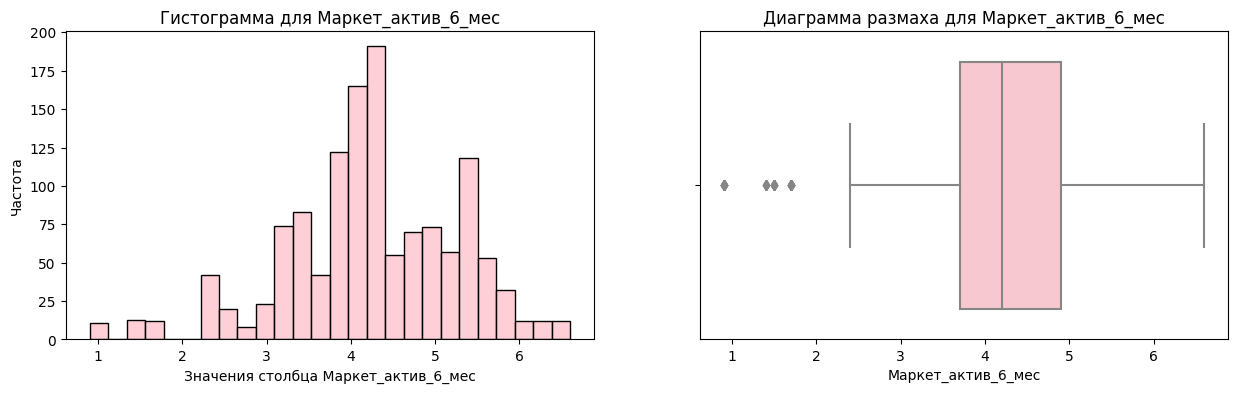

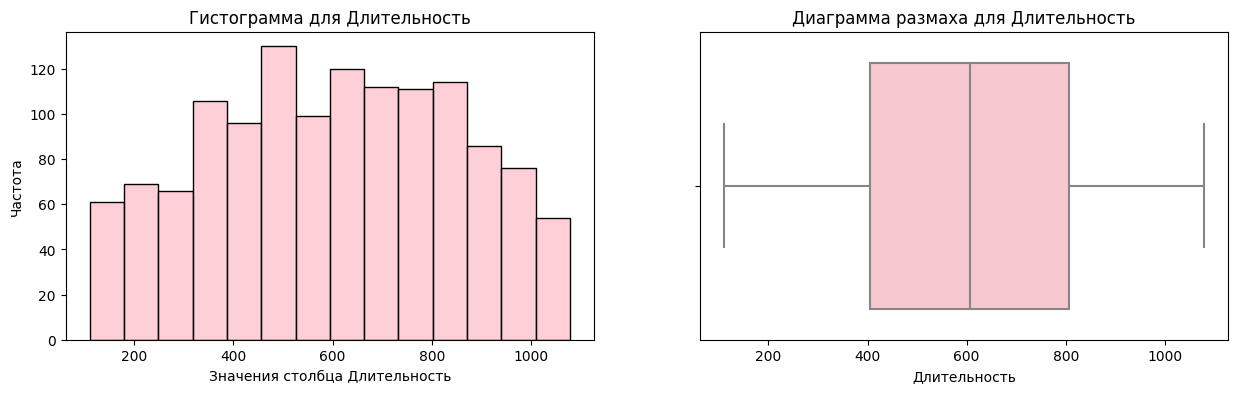

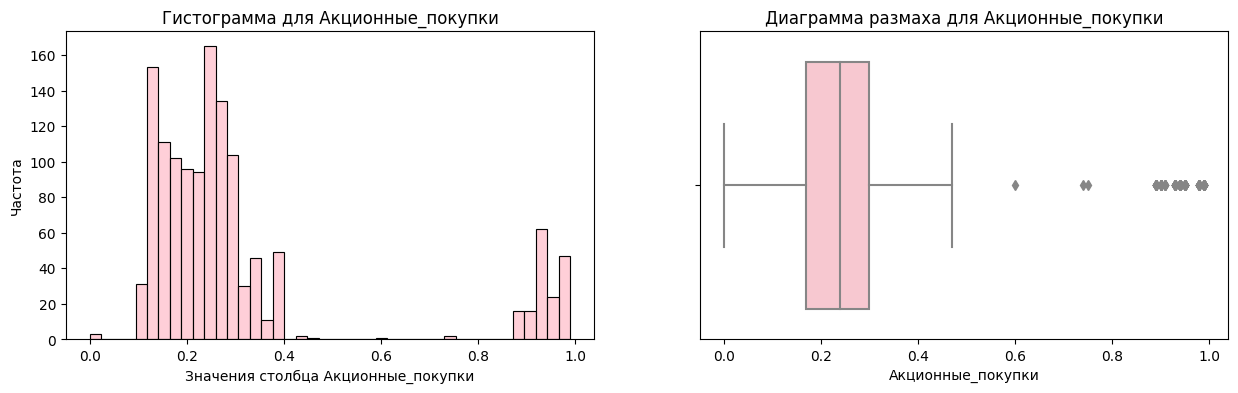

In [17]:
#построение распределений количественных признаков датасета market_file
for name in num_col_market:
    hist_box(market_file, name)

In [18]:
#создание функции для построения гистограммы диаграммы размаха для столбцов с дискретными признаками
def count_di(data, column):
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    plt.xlabel(f'Значения столбца {column}')
    plt.ylabel('Частота')
    plt.title(f'Гистограмма для {column}')
    sns.countplot(data = data, x = data[column], color='pink')

In [19]:
def categoral_unique(df, col):
    display(df[col].unique())
    
    plt.figure(figsize=(8,6))
    plot = sns.countplot(y=col, data=df)
    plot.set_title(f'Рапределение по {col}', fontsize=16)
    plot.set_xlabel('Количество', fontsize=14)

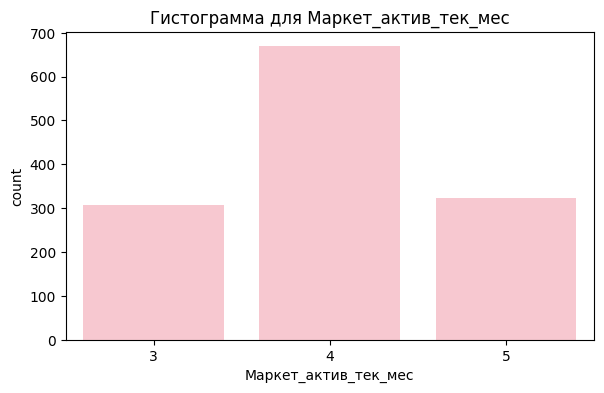

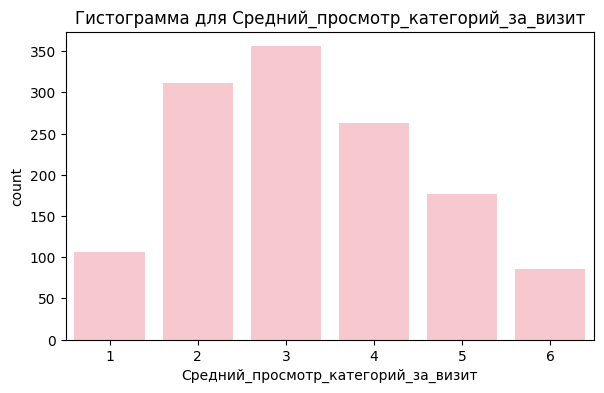

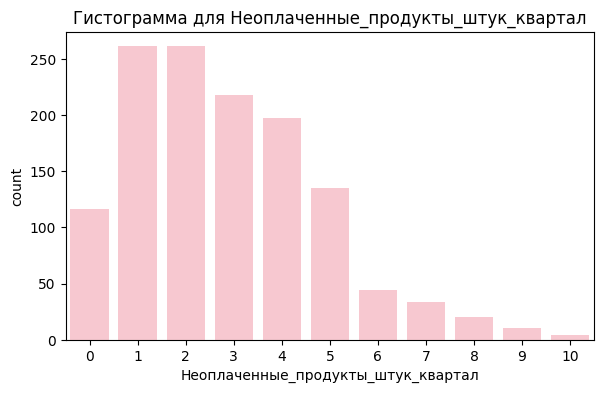

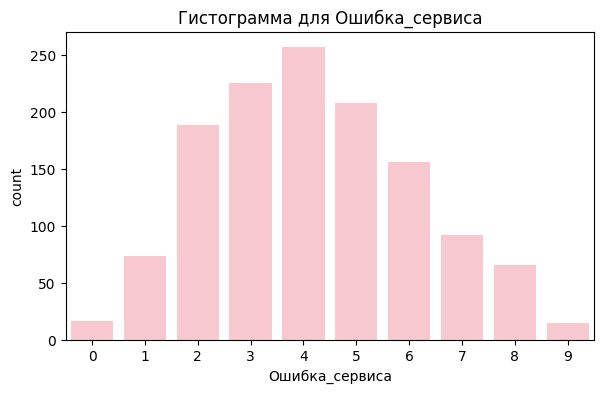

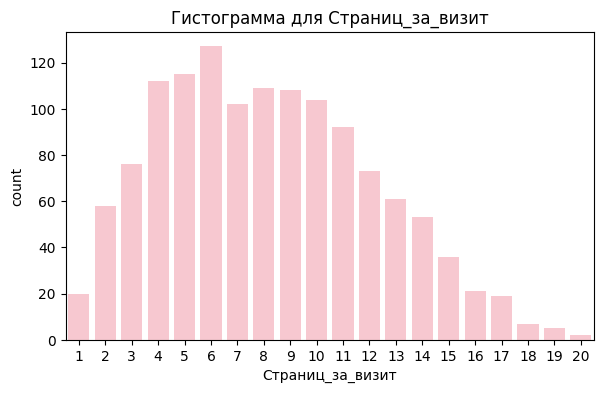

In [20]:
#построение распределений дискретных признаков датасета market_file
for name in market_di:
    count_di(market_file, name)

**Вывод:**
   * **Маркет_актив_6_мес** распределен нормально, однако имеются выбросы в минимальных значениях. Думаю, что выброс до 2 нужно будет удалить, но сомневаюсь так как данных итак мало. 
   * **Маркет_актив_тек_мес** имеет только три значения. Возможно стоит перевести в категириальный вид.
   * **Длительность** распределено нормально.
   * **Акционные_покупки** (т.е. если данные близки к 1, то 100 проц покупок по акции) Распределено на два участка. Имеет бимодальное распределение. Могу сделать предположение, что есть люди, которые берут только акционные товары в магазине и их существенное количество. 
   * **Средний_просмотр_категорий_за_визит** можно тоже изменить на категориальный так как имеет только 6 значений. распределено нормально.
   * **Неоплаченные_продукты_штук_квартал** хотела бы проверить значение < 1 и > 0. В данных должны быть целые числа. Есть выбросы. И перевести в категориальный тип.
   * **Ошибка_сервиса** распределено нормально. Так же проверить значения на целостность и изменить на категориальный
   * **Страниц_за_визит** распредлено нормально, но скошенно влево

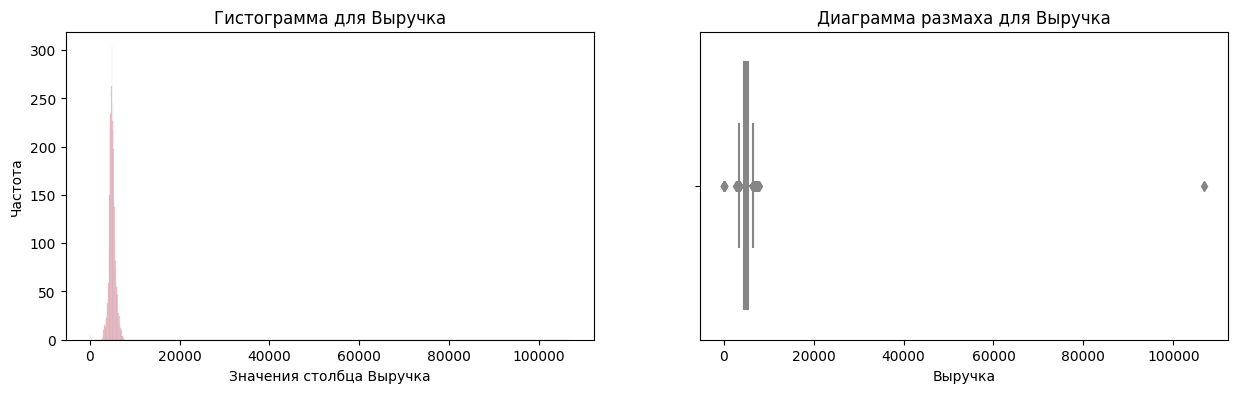

In [21]:
#построение распределений количественных признаков датасета market_money
hist_box(market_money, 'Выручка')

**Вывод:**
   * Как и думала очень большой выброс в данных. Сразу удалим со всех таблиц id покупателя с выручкой в 100 000 и более

In [22]:
data = [market_file, market_time, market_money, money]

In [23]:
list_id = market_money.query('Выручка > 20000')['id'].tolist()

In [24]:
market_money = market_money[~market_money['id'].isin(list_id)]
market_file = market_file[~market_file['id'].isin(list_id)]
market_time = market_time[~market_time['id'].isin(list_id)]

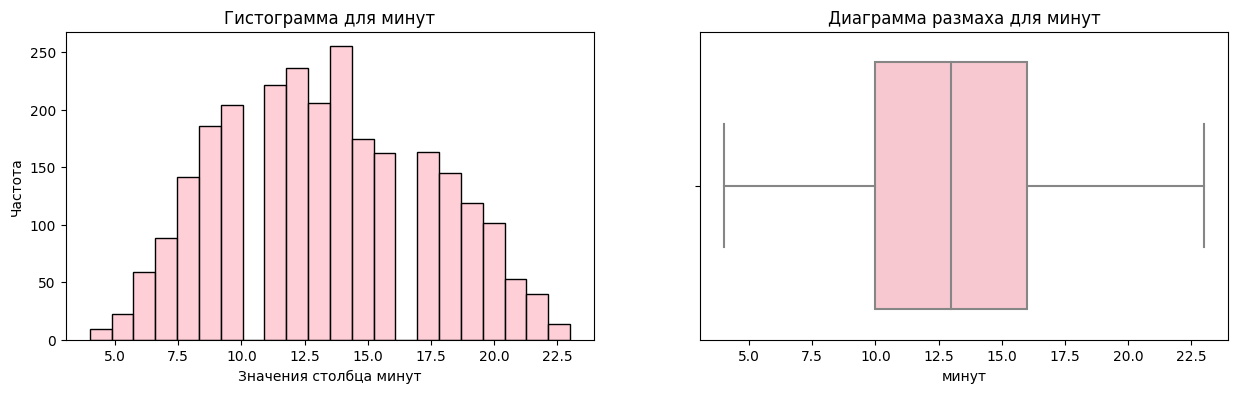

In [25]:
#построение распределений количественных признаков датасета market_time
hist_box(market_time, 'минут')

Выбросов нет. Нормальное распределение.

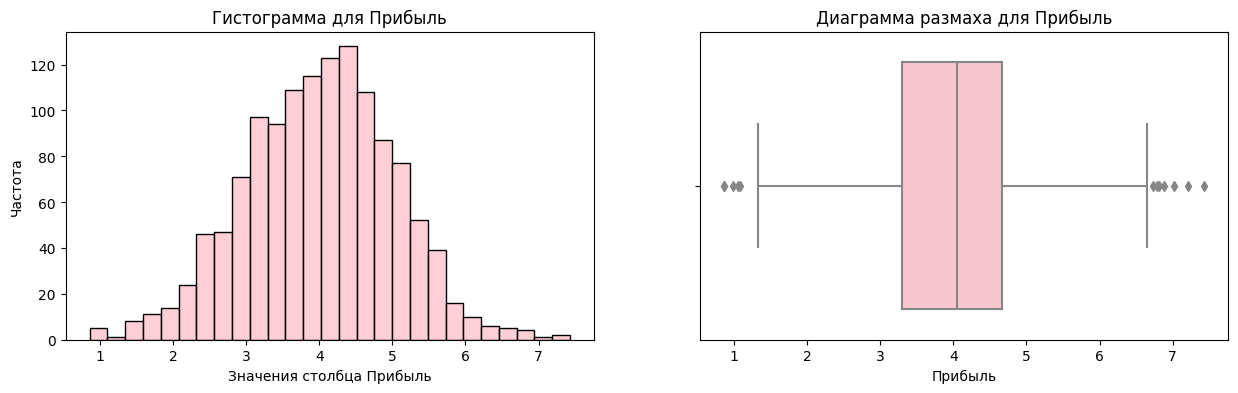

In [26]:
#построение распределений количественных признаков датасета money
hist_box(money, 'Прибыль')

Выбросы есть, но не критичные. Распределение нормальное.

### Категориальные признаки 

In [27]:
def pie_graph(dataset, column, name, n, i):
    plt.subplot(1, n, i)
    plt.title(column)
    plt.pie(x=dataset.groupby(column)[name].count(),
            startangle=90,
            labeldistance=1.1, 
            wedgeprops={'linewidth':3, 'edgecolor':'white'}, 
            autopct='%1.1f%%',
            labels=dataset.groupby(column)[name].count().index, 
            colors=sns.color_palette('BuPu_r'))

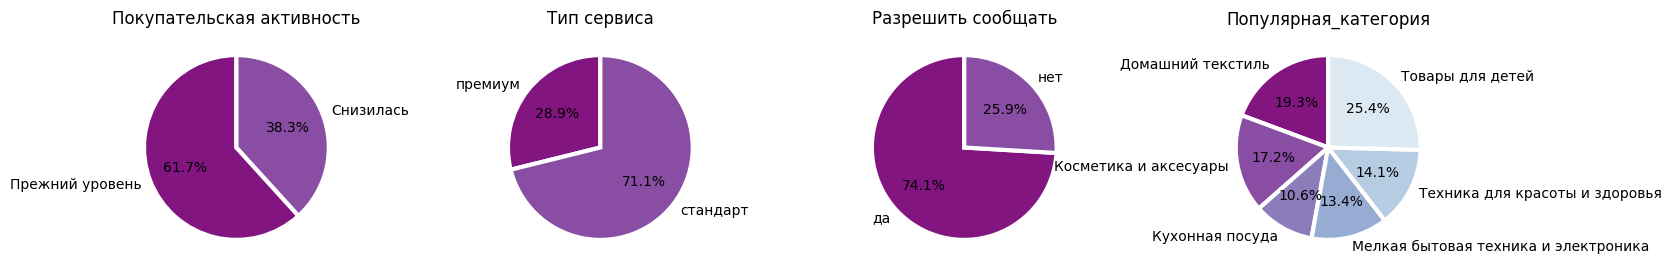

In [28]:
#круговые диаграммы для датасета market_file
i = 1
plt.figure(figsize=(18,3))
for name in cat_col_market:
    pie_graph(market_file, name, 'id', len(cat_col_market), i)
    i += 1

**Вывод:**
   * **Покупательская активность** на 61 процент остаётся на прежмен уровне. 
   * **Тип сервиса** в 71 проценте имеет стандартный тип.
   * **Разрешить сообщать** в 74 процентах заказчик расрешает сообщать.
   * **Популярные категории** самой популярной являются Товары для детей, далее Домашний текстиль и Косметика и аксесуары.

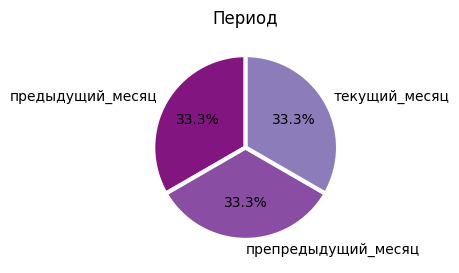

In [29]:
#круговые диаграммы для датасета market_money
i = 1
plt.figure(figsize=(18,3))
pie_graph(market_money, 'Период', 'id', 1, i)

**Вывод:** Период по данным распределен равномерно в таблице market_money

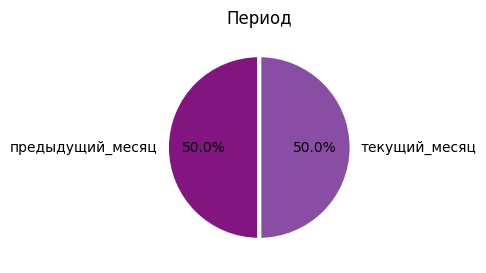

In [30]:
#круговые диаграммы для датасета market_time
i = 1
plt.figure(figsize=(18,3))
pie_graph(market_time, 'Период', 'id', 1, i)

**Вывод:** Период по данным распределен равномерно в таблице market_time

### Клиенты с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

In [31]:
#выбор пользователей, не принесших выручку в течение последних 3 месяцов
list_id = market_money.query('Выручка == 0')['id']

In [32]:
print(list_id)

0     215348
2     215348
28    215357
29    215357
34    215359
35    215359
Name: id, dtype: int64


In [33]:
#стоит удалить этих клиентов из датасетов всех
market_money = market_money[~market_money['id'].isin(list_id)]
market_file = market_file[~market_file['id'].isin(list_id)]
market_time = market_time[~market_time['id'].isin(list_id)]

In [34]:
#стоит удалить этих клиентов из датасетов всех
#market_file = market_file.query('id != [215348,215357, 215359]')
#market_time = market_time.query('id != [215348,215357, 215359]')
#money = money.query('id != [215348,215357, 215359]')
#market_money = market_money.query('id != [215348, 215357, 215359]')

## Объединение таблиц

### Объедините таблицы market_file.csv, market_money.csv, market_time.csv.

In [35]:
#с помощью pivot нужно сгрупировать по периоду данные.
market_money2 = pd.pivot_table(market_money, values='Выручка', index='id',
                       columns= 'Период')
# теперь избавиться от индекса c помощью resept_index
market_money2 = market_money2.reset_index()
#хочу изменить колонки для выручки
market_money2 = market_money2.rename(columns={'предыдущий_месяц':'предыдущий_месяц_выручка', 
                                              'препредыдущий_месяц':'препредыдущий_месяц_выручка', 
                                              'текущий_месяц':'текущий_месяц_выручка'})
display(market_money2.head())
print('market_money2', market_money2.shape[0])

Период,id,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка
0,215349,5216.0,4472.0,4971.6
1,215350,5457.5,4826.0,5058.4
2,215351,6158.0,4793.0,6610.4
3,215352,5807.5,4594.0,5872.5
4,215353,4738.5,5124.0,5388.5


market_money2 1296


In [36]:
#повторим тоже с market_time 
market_time2 = pd.pivot_table(market_time, index='id', values='минут',
                       columns= 'Период')
market_time2 = market_time2.reset_index()
market_time2 = market_time2.rename(columns={'предыдущий_месяц':'предыдущий_месяц_минут',
                                            'текущий_месяц':'текущий_месяц_минут'})
display(market_time2.head())
print('market_time2', market_time2.shape[0])

Период,id,предыдущий_месяц_минут,текущий_месяц_минут
0,215349,12,10
1,215350,8,13
2,215351,11,13
3,215352,8,11
4,215353,10,10


market_time2 1296


In [37]:
# объединяем таблицы 
market = pd.merge(market_file, market_money2, on = 'id', how='outer')
market = pd.merge(market, market_time2, on = 'id', how='outer')
display(market.head())
print('market_time2', market.shape[0])

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


market_time2 1296


## Корреляционный анализ

In [38]:
#!pip install phik -q
#import phik
#from phik import resources, report

**Используем корреляцию с помощью метода phik, так как в нашем датасете есть категориальные, дискретные, непрерывные признаки. В параметр interval_cols передаем названия непрерывных признаков.**

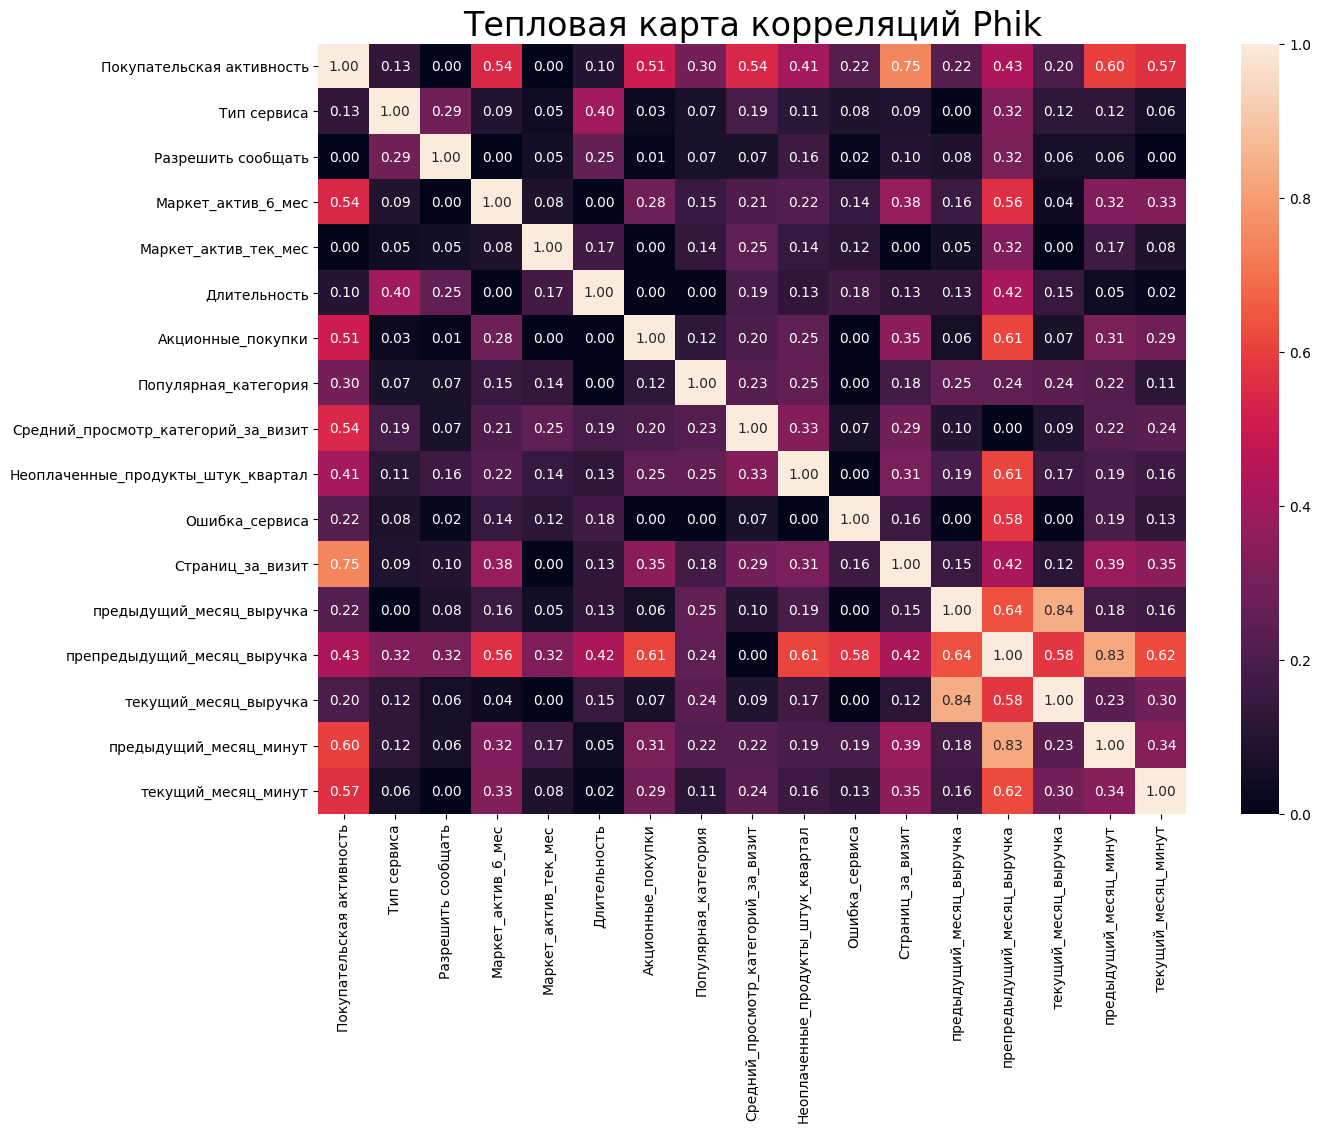

In [39]:
#построю тепловую карту корреляции
market = market.drop(['id'], axis =1)
plt.figure(figsize=(14,10))
sns.heatmap(market.phik_matrix(interval_cols=['Маркет_актив_6_мес', 'Длительность', 'Акционные_покупки',
                                                'выручка_препредыдущий_месяц', 'предыдущий_месяц_выручка',
                                                'текущий_месяц_выручка']), annot = True, fmt = '.2f')
plt.title('Тепловая карта корреляций Phik', fontsize=24)
plt.show()

**Вывод:** 
* Наблюдается сильная зависимость между выручкой предпредыдущего месяца и предыдущего. 
* Наблюдается сильная зависимость так же между предыдущий_месяц_минут и препредыдущий_месяц_выручка
* Так же умеренная положительная корреляция сколько минут проводит человек на сайте и сколько страниц было посещено. По-моему, логично, если время увеличивается то и страниц просмотрено больше.


Чтобы избавиться от мультиколлинеарности следует объединить столбцы 'текущий месяц выручка' и ' предыдущий месяц' в столбец за 2 месяца
чтобы избавиться от мультиколлинеарности следует объединить столбы текущий менят минут и предыдущий месяц в столбец за 2 месяца

In [40]:
market.columns

Index(['Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит', 'предыдущий_месяц_выручка',
       'препредыдущий_месяц_выручка', 'текущий_месяц_выручка',
       'предыдущий_месяц_минут', 'текущий_месяц_минут'],
      dtype='object')

In [41]:
market['выручка_2_мес'] = market['препредыдущий_месяц_выручка'] + market['предыдущий_месяц_выручка']
market = market.drop(columns = ['препредыдущий_месяц_выручка','предыдущий_месяц_выручка'], axis = 1)

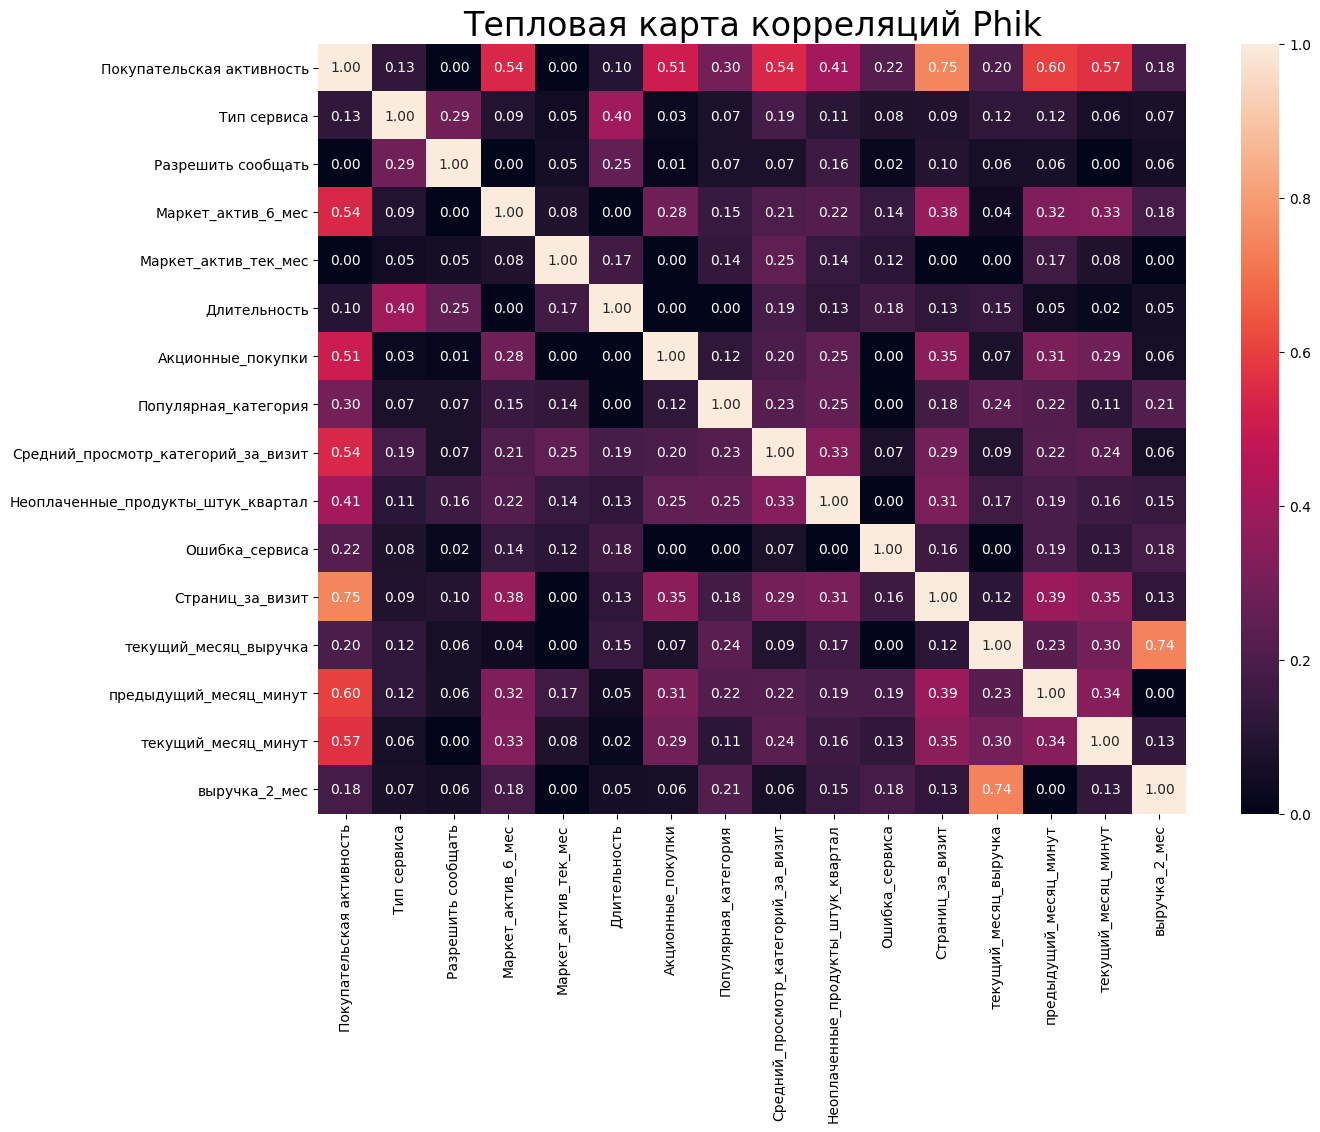

In [42]:
#Получаем матрицу корреляций
phik_matrix = market.phik_matrix(interval_cols=['Маркет_актив_6_мес', 'Длительность', 'Акционные_покупки', 
                                                   'текущий_месяц_выручка', 'выручка_2_мес'])

# Создаем тепловую карту
plt.figure(figsize=(14, 10))
sns.heatmap(phik_matrix, annot=True, fmt='.2f')
plt.title('Тепловая карта корреляций Phik', fontsize=24)
plt.show()


**Обнаружена высокая корреляцию между выручкой в предпредыдущем месяце и в предыдущем. И высокая корреляция между препредыдущем месяцев выручки и текщим месяцем минут. Избавились от  мультиколлинеарности  с помощью объединения двух столбцов в один. **

## Использование пайплайнов

### Подготовка пайпланов для моделей


~~from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer ~~

In [43]:
#тестовая выборка и целевой признак
RANDOM_STATE = 42
TEST_SIZE = 0.25

X_train, X_test, y_train, y_test = train_test_split(
    market.drop(['Покупательская активность'], axis=1),
    market['Покупательская активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = market['Покупательская активность'])

In [44]:
#закодировать целевой признак 
#кодирование целевого признака
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [45]:
# создаём списки с названиями признаков
ohe_columns = ['Популярная_категория']

In [46]:
print(market.head())

  Покупательская активность Тип сервиса Разрешить сообщать  \
0                 Снизилась     премиум                 да   
1                 Снизилась    стандарт                нет   
2                 Снизилась    стандарт                 да   
3                 Снизилась    стандарт                нет   
4                 Снизилась    стандарт                 да   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 4.4                     4           819               0.75   
1                 4.9                     3           539               0.14   
2                 3.2                     5           896               0.99   
3                 5.1                     3          1064               0.94   
4                 3.3                     4           762               0.26   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    4   
1    Домашний тексти

In [47]:
#порядковые признаки 
ord_columns = ['Тип сервиса', 'Разрешить сообщать']
num_columns = ['Маркет_актив_6_мес', 'Длительность', 'Акционные_покупки','текущий_месяц_выручка',
               'предыдущий_месяц_минут','текущий_месяц_минут', 'выручка_2_мес', 'Страниц_за_визит',
               'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Маркет_актив_тек_мес', 
               'Средний_просмотр_категорий_за_визит'] 

In [49]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков более частным и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore',  sparse_output=False))
    ]
    )

In [50]:
# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'],
                    ['да', 'нет']], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [51]:
data_preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe_columns),
        ('ord', OrdinalEncoder(), ord_columns),
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler())
        ]), num_columns)
    ],
    remainder='passthrough'
)

In [52]:
# preprocessor__num = preprocessor_ + _num:
# preprocessor__num — пайплайн, в котором находится шаг масштабирования
# num — шаг масштабирования с методом и списком столбцов
# заодно укажем 'passthrough' — вариант без масштабирования
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

### Обучение моделей и выбор метрик 

Выберите подходящую для задачи метрику, аргументируйте свой выбор. Используйте эту метрику при подборе гиперпараметров.

In [53]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
   # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, kernel='poly', probability=True)],
        'models__degree': range(2, 3),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }

]

**Пояснение по метрике:** ~~Отражает зависимость TPR и FPR, поэтому всегда даёт адекватную оценку качества модели.~~


ROC AUC (Receiver Operating Characteristic Area Under the Curve) — это метрика, которая используется для оценки качества классификационных моделей. Она представляет собой площадь под кривой ошибок (false positive rate против true positive rate).

ROC AUC принимает значения от 0 до 1, где 1 означает идеальную модель, а 0 — случайную модель. Эта метрика полезна для сравнения различных моделей и выбора лучшей из них.


ROC AUC применяется в задачах бинарной классификации, где модель должна определить, к какой из двух категорий относится объект. Это может быть задача определения наличия покупательской активности.

Например, если прогнозируется вероятность Снижения покупательской активности, то положительным исходом будет класс «Снизилась», отрицательным — «Прежняя». И наоборот, если нужно определить вероятность того, что активность снизилась, то положительным исходом будет класс «Снизилась». 1

ROC AUC оценивает способность модели правильно сортировать объекты по вероятности принадлежности к классу. Чем больше эта площадь, тем лучше модель.

### Нахождение лучшей модели по RandomizedSearchCV

In [54]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [55]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Популярная_категория']),
                                                                              ('ord',
                                                                               OrdinalEncoder(),
                                                                               ['Тип '
                                                                                'сервиса',
                                                                                'Разрешить '
                                                                                'сообщать']),
                                                                              ('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                MinMaxScaler())]),
                                                                               ['Маркет_акти...
                                        {'models': [LogisticRegression(penalty='l1',
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(kernel='poly',
                                                        probability=True,
                                                        random_state=42)],
                                         'models__degree': range(2, 3),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [56]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Популярная_категория']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Тип сервиса',
                                                   'Разрешить сообщать']),
                                                 ('num', MinMaxScaler(),
                                                  ['Маркет_актив_6_мес',
                                                   'Длительность',
                                                   'Акционные_покупки',
                                                   'текущий_месяц_выручка',
                                                   'предыдущий_месяц_минут

In [57]:
# Обучаем DummyClassifier на тренировочной выборке
dummy_clf = DummyClassifier(strategy='most_frequent') 
dummy_clf.fit(X_train, y_train)

# Получаем предсказания для тестовой выборки
y_dummy_pred = dummy_clf.predict(X_test)
y_dummy_prob = dummy_clf.predict_proba(X_test)[:, 1]  # Если используем 'mean', то это будет просто среднее

# Вычисляем ROC-AUC для константной модели
dummy_roc_auc = roc_auc_score(y_test, y_dummy_prob)
print(f'ROC-AUC для константной модели: {dummy_roc_auc}')

# Теперь сравниваем с  лучшей моделью
best_model = randomized_search.best_estimator_  
y_best_pred = best_model.predict(X_test)
y_best_prob = best_model.predict_proba(X_test)[:, 1]

# Вычисляем ROC-AUC для лучшей модели
best_roc_auc = roc_auc_score(y_test, y_best_prob)
print(f'ROC-AUC для лучшей модели: {best_roc_auc}')

# Сравниваем результаты
if best_roc_auc > dummy_roc_auc:
    print("Лучшая модель значительно лучше константной модели.")
else:
    print("Лучшая модель не показала значительного улучшения по сравнению с константной моделью.")

ROC-AUC для константной модели: 0.5
ROC-AUC для лучшей модели: 0.9170408121991669
Лучшая модель значительно лучше константной модели.


### Нахождение лучшей модели по GridSearchCV

In [58]:
'''
models — инициализированная модель
param_grid — словарь с гиперпараметрами модели
cv — тип кросс-валидации
scoring — метрика, которую используем для выбора лучшего решения
n_jobs=-1 — подключаем к расчёту ядра процессора
'''


#поиск оптимальной модели без перебора гиперпараметров
grid = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5, 
    scoring='roc_auc', 
    n_jobs=-1
)

#обучение модели на тренировочной выборке
grid.fit(X_train, y_train)

#вывод лучшей модели
print('Лучшая модель и её параметры:', grid.best_estimator_)
print ('Метрика лучшей модели:', grid.best_score_)

Лучшая модель и её параметры: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Популярная_категория']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Тип сервиса',
                                                   'Разрешить сообщать']),
                                                 ('num', MinMaxScaler(),
                                                  ['Маркет_актив_6_мес',
                                                   'Длительность',
                                                   'Акционные_покупки',
                                                   'текущий_месяц_выручка',
                                                   'предыдущий_месяц_минут',

In [59]:
# Получаем вероятности для положительного класса
y_test_prob = randomized_search.predict_proba(X_test)[:, 1]

# Вычисляем метрику ROC-AUC
roc_auc = roc_auc_score(y_test, y_test_prob)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc}')

Метрика ROC-AUC на тестовой выборке: 0.9170408121991669


**Вывод:** Лучшей моделью оказалась LogisticRegression. Метрика лучшей модели: 0.9019913930459384

## Анализ важности признаков

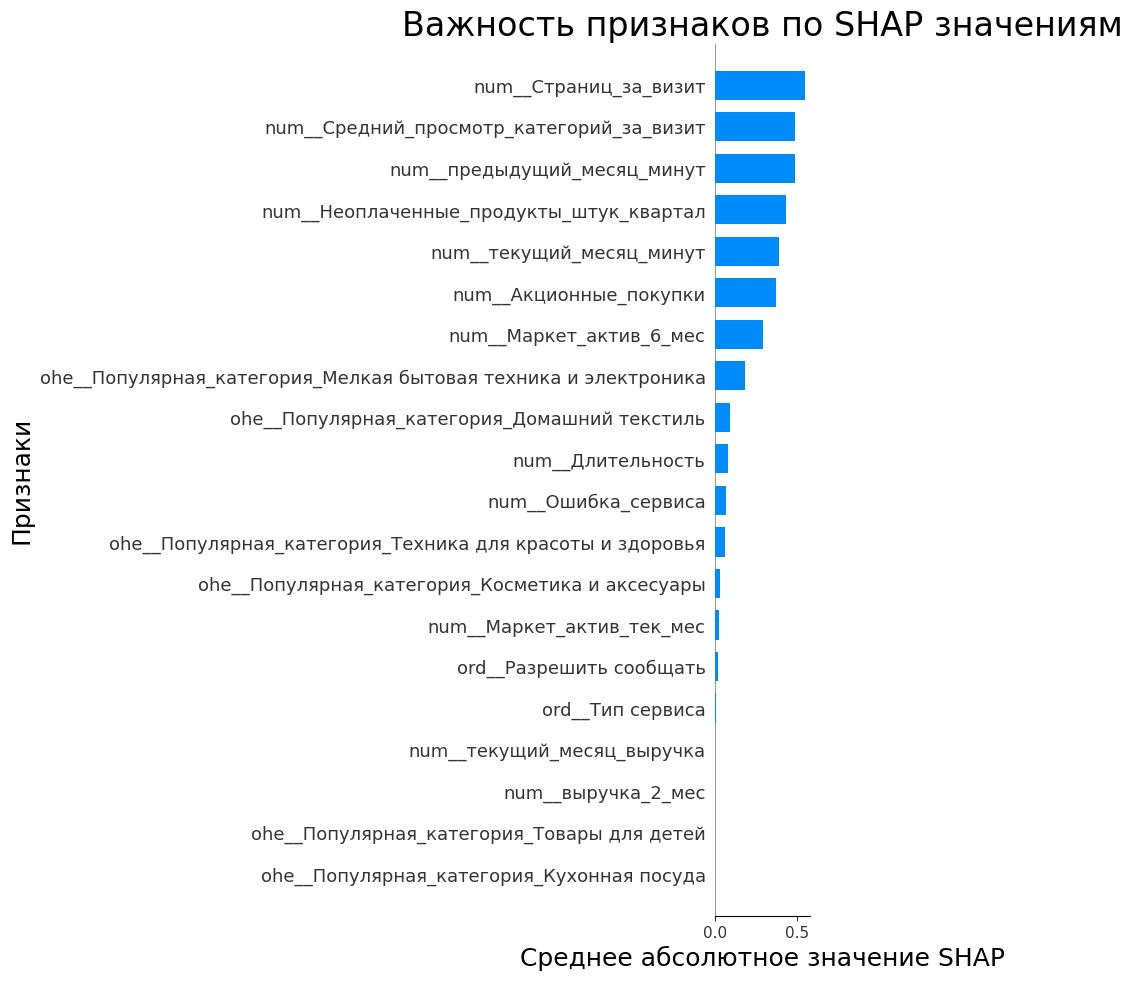

In [60]:
# Инкодируем с помощью пайплайна
X_transformed = grid.best_estimator_['preprocessor'].fit_transform(X_train)

# Обучаем на лучших моделях из грида закодированные данные
model = grid.best_estimator_['models'].fit(X_transformed, y_train)

# Получаем названия признаков
feature_names = grid.best_estimator_['preprocessor'].get_feature_names_out()

# Создаем SHAP объяснитель
explainer = shap.LinearExplainer(model, X_transformed)

# Получаем SHAP значения
shap_values = explainer.shap_values(X_transformed)

# Устанавливаем размеры графика
plt.figure(figsize=(20, 10))

# Строим bar plot для SHAP значений
shap.summary_plot(shap_values, features=X_transformed, feature_names=feature_names, plot_type="bar", show=False)

# Добавляем название графика и подписи осей
plt.title("Важность признаков по SHAP значениям", fontsize=24)
plt.xlabel("Среднее абсолютное значение SHAP", fontsize=18)
plt.ylabel("Признаки", fontsize=18)

# Показываем график
plt.show()

К сожалению как бы я не пыталась я не смогла вытащить имена признаком из пайплайна, поэтому все что я могу сказать это то что Feature 0 вносит сильный ший вклад в решение модели.

##  Сегментация покупателей

### Выполнить сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.

In [61]:
#добавление к данным покупателей их 
#вероятности отношения к классу 1 (сниженный уровень активности)
y_pred = grid.predict_proba(X_test)
X_test['вероятность'] = y_pred[:, 1]
data = X_test.sort_values(by='вероятность')
data.head()

,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут,выручка_2_мес,вероятность
423,стандарт,нет,5.0,4,157,0.15,Мелкая бытовая техника и электроника,5,0,5,13,3372.8,19,16,8962.0,0.003184
1058,премиум,да,4.8,3,939,0.11,Домашний текстиль,6,1,7,12,4236.6,21,23,8738.0,0.003745
1272,стандарт,да,5.4,5,806,0.17,Домашний текстиль,6,1,8,11,6102.4,22,19,10661.5,0.005548
1237,стандарт,да,4.1,5,447,0.14,Косметика и аксесуары,6,0,9,12,5894.6,20,17,10475.5,0.006397
1201,стандарт,да,6.1,4,298,0.27,Домашний текстиль,6,3,6,16,5149.4,19,14,10067.5,0.009479


In [62]:
df = data.join(money)

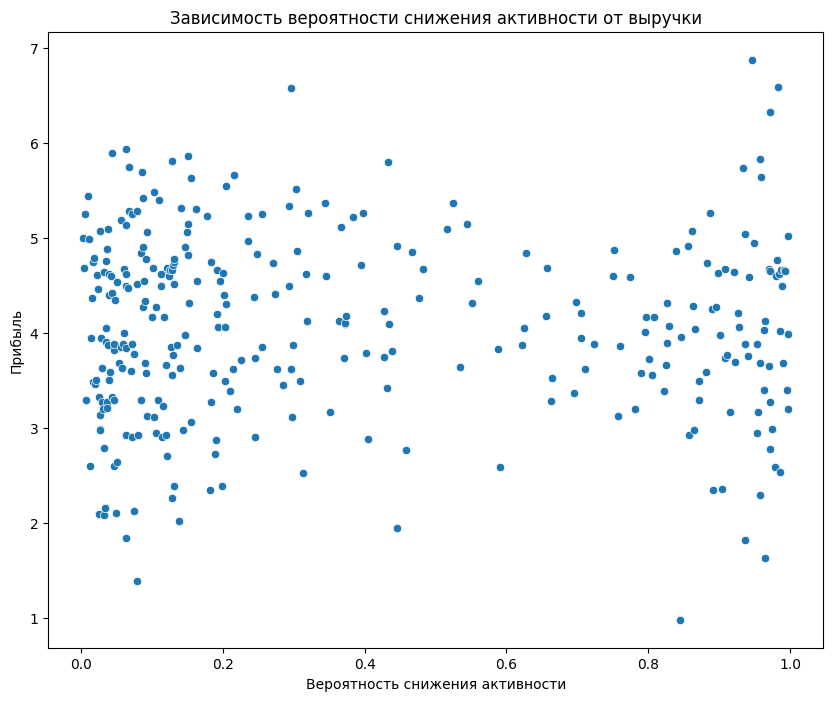

In [63]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=df, y='Прибыль', x='вероятность')
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Прибыль')
plt.title('Зависимость вероятности снижения активности от выручки')
plt.show()

Получили диаграмму рассеивания Прибыли и Вероятности снижения активности покупателя. Я не вижу зависимости вероятности снижения активности пользователя от прибыли

In [64]:
def build_scatterplots(cat_columns):
    for cat_col in cat_columns:
        fig = plt.figure(figsize=(10,8))
        sns.scatterplot(data=df, y='Прибыль', x='вероятность', hue=cat_col)
        plt.xlabel('Вероятность снижения активности')
        plt.ylabel('Прибыль')
        plt.title('Зависимость вероятности снижения активности от выручки')
        plt.show()

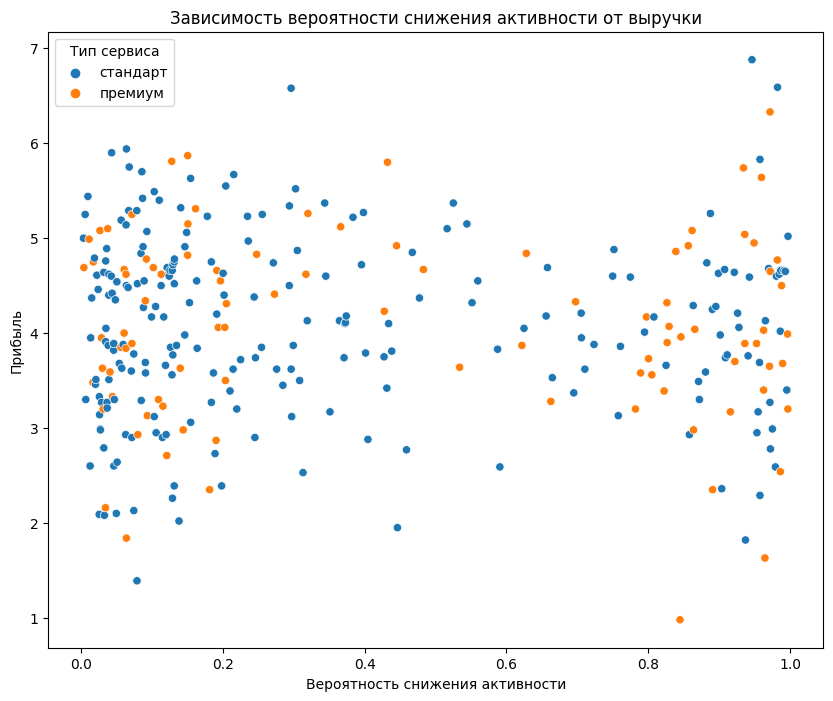

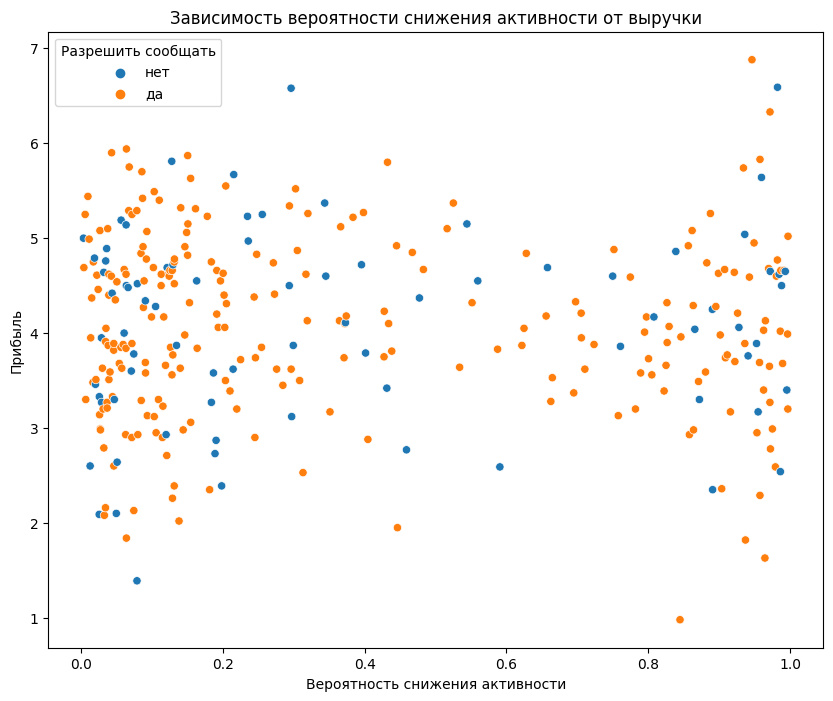

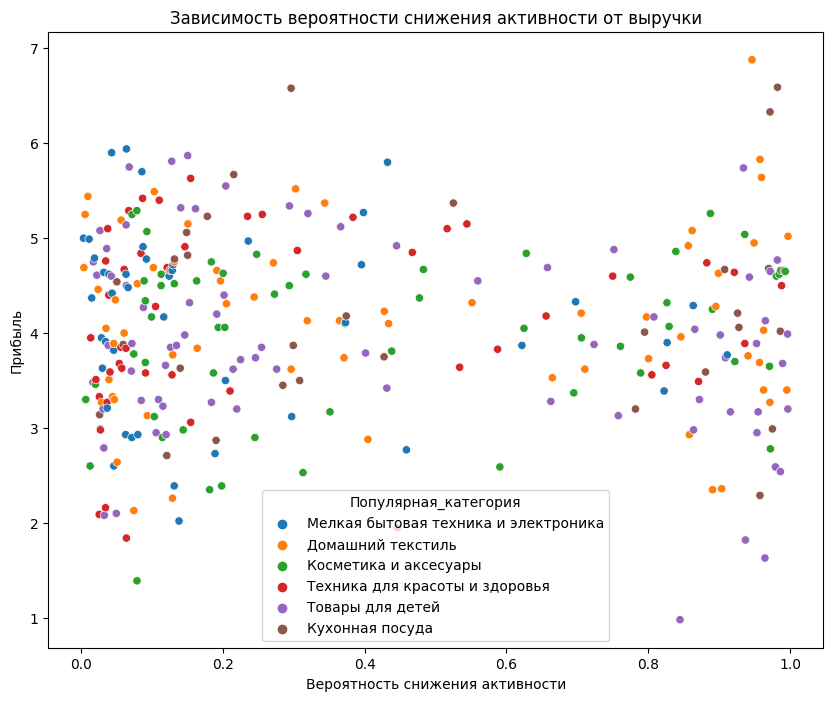

In [65]:
cat_columns = list(df.select_dtypes(include='object').columns)
build_scatterplots(cat_columns)

In [66]:
def histogram(df, col, target):
    plt.figure(figsize=(8,6))
    plot = sns.histplot(df, bins=20, kde=True, hue=target, x=col)
    plot.set_title(f'Рапределение по {col}', fontsize=16)
    plot.set_ylabel('Количество', fontsize=14)
    
    
def categoral_unique(df, col):
    display(df[col].unique())
    
    plt.figure(figsize=(8,6))
    plot = sns.countplot(y=col, data=df)
    plot.set_title(f'Рапределение по {col}', fontsize=16)
    plot.set_xlabel('Количество', fontsize=14)

In [67]:
cat_columns = list(df.select_dtypes(include='object').columns)
di_columns = market_di
num_columns = ['Маркет_актив_6_мес', 'Длительность', 'Акционные_покупки', 'текущий_месяц_выручка', 'выручка_2_мес', 'Прибыль']

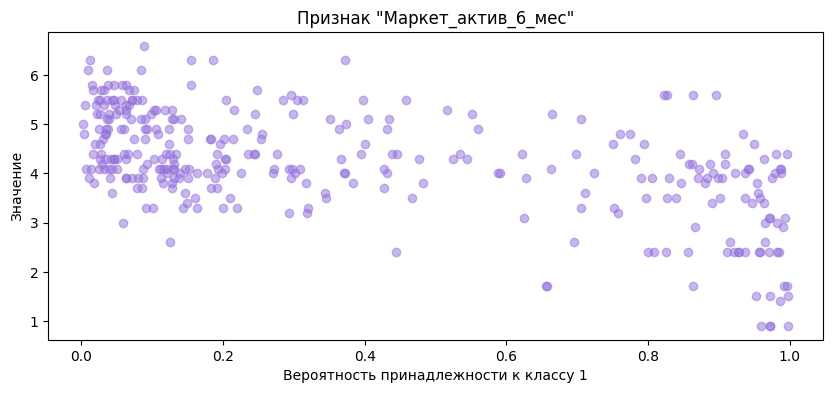

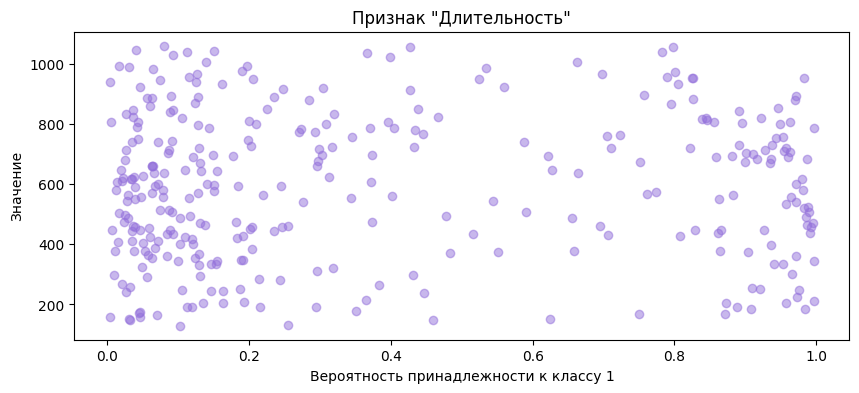

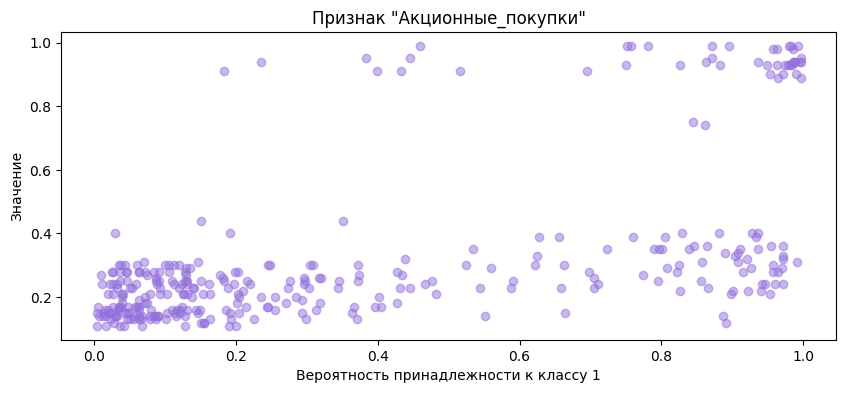

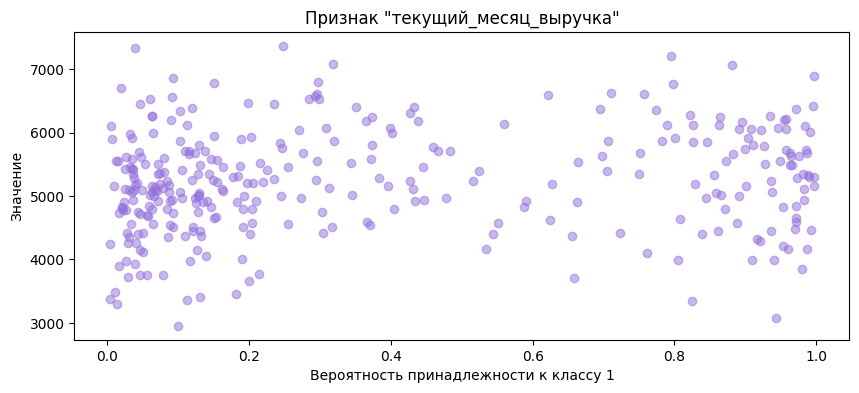

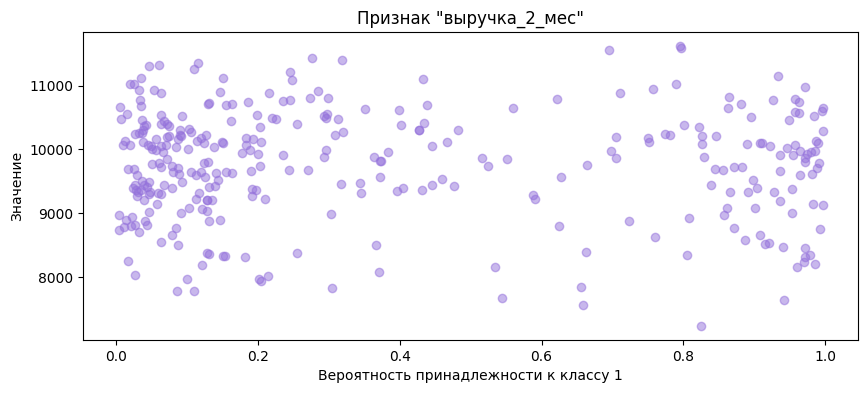

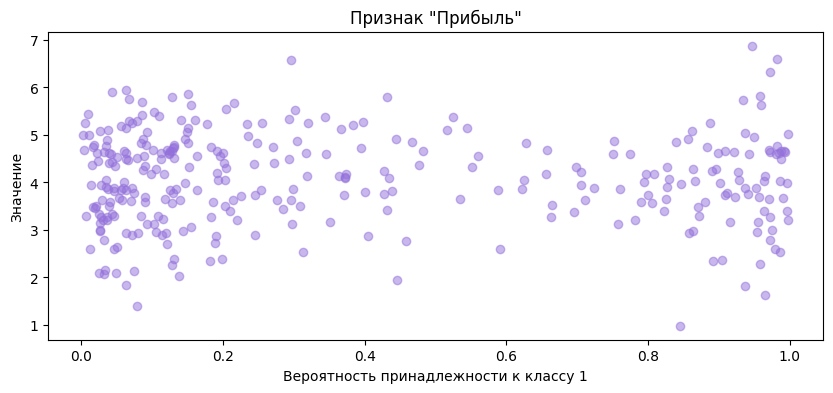

In [68]:
#построение scatter plot для распределения кол.  
#признаков в зависимости от вероятности принадлежности к класс
for name in num_columns:
    plt.figure(figsize=(10, 4))
    plt.title(f'Признак "{name}"')
    plt.xlabel('Вероятность принадлежности к классу 1')
    plt.ylabel(f'Значение')
    plt.scatter(x=df['вероятность'], 
                y=df[name],
                alpha=0.5, 
                c='MediumPurple')

На основании приведенных графиков можно выделить следующие пороги значений признака для разделения покупателей на классы. В частности, покупатели со сниженной активностью имеют значения признака:

* **Маркет_актив_6_мес** менее 3;
* **Акционные покупки** выше 0.6;
* **Средний просмотрт категорий_за_визит** менее 3;
* **неоплачено_штук** более 5;
* **страницы за визит** менее 7;
* **минуты_пред** ниже 14;
* **минуты_тек** ниже 14.
В остальных признаках сложно выделить пороги.

Можно выделить сегмент покупателей, которые покупают в основном акционные товары, то есть со значениями признака **Акционные покупки** более 0.6, поскольку активность таких покупателей снизилась на последнее время

### Выделение сегмента на основе вероятности и прибыли

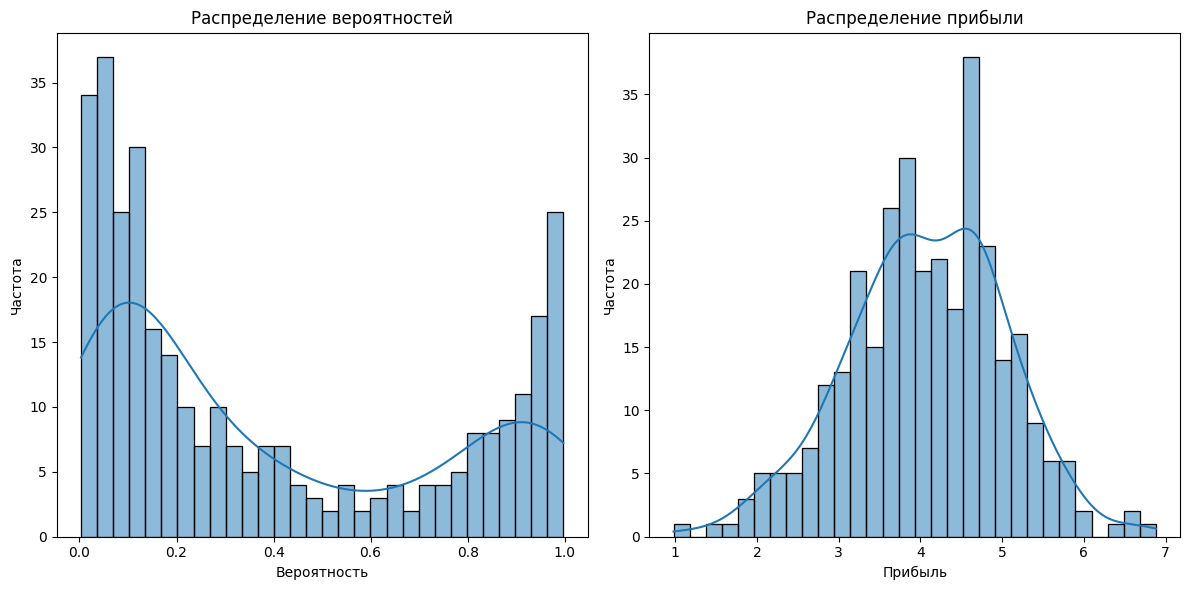

In [69]:
# 1. Исследование распределения
plt.figure(figsize=(12, 6))

# Гистограмма вероятностей
plt.subplot(1, 2, 1)
sns.histplot(df['вероятность'], bins=30, kde=True)
plt.title('Распределение вероятностей')
plt.xlabel('Вероятность')
plt.ylabel('Частота')

# Гистограмма прибыли
plt.subplot(1, 2, 2)
sns.histplot(df['Прибыль'], bins=30, kde=True)
plt.title('Распределение прибыли')
plt.xlabel('Прибыль')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()


Находим значения, где вероятность и прибыль высокие.

In [70]:
prob_threshold = df['вероятность'].quantile(0.75)
profit_threshold = df['Прибыль'].quantile(0.75)

In [71]:
segment = df[(df['вероятность'] > prob_threshold) & (df['Прибыль'] > profit_threshold)]
print(segment.shape[0])

15


array(['Косметика и аксесуары', 'Домашний текстиль',
       'Техника для красоты и здоровья', 'Товары для детей',
       'Кухонная посуда'], dtype=object)

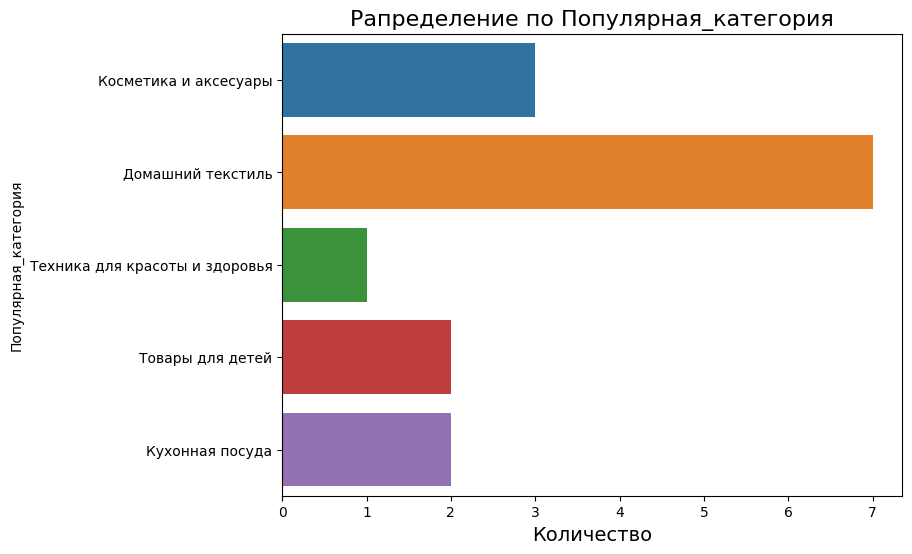

In [72]:
categoral_unique(segment, 'Популярная_категория')

Товары для детей популярная категория для людей, которые покупают товары по акции.

array(['премиум', 'стандарт'], dtype=object)

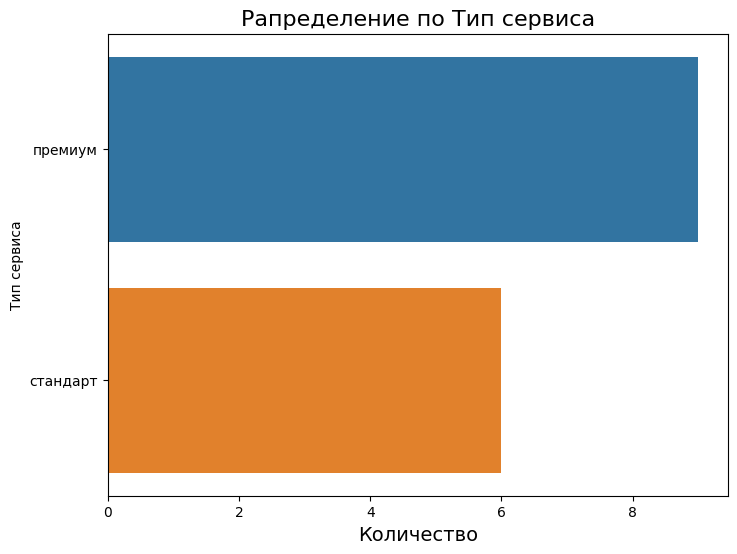

In [73]:
categoral_unique(segment, 'Тип сервиса')

Логично, что люди, которые покупают по акции берут в основном стандартные вещи.

array(['нет', 'да'], dtype=object)

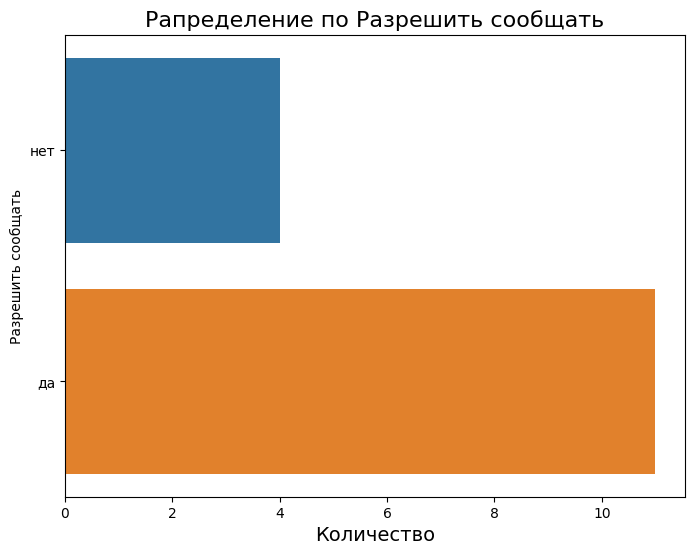

In [74]:
categoral_unique(segment, 'Разрешить сообщать')

In [75]:
#Cоздала список непрерывных величин
neprerivni = ['Маркет_актив_6_мес', 'Длительность', 'Акционные_покупки', 'текущий_месяц_выручка', 'предыдущий_месяц_минут',
  'текущий_месяц_минут', 'выручка_2_мес', ]

In [76]:
def nepr_d(column):
    for i in column:
        plt.figure(figsize=(15, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(segment[i], bins=30, stat='density', common_norm=False, kde=True)
        plt.xlabel(f'Значения столбца {i}')
        plt.ylabel('Плотность')
        plt.title(f'Гистограмма для {i}')
        plt.tight_layout()
        plt.show()

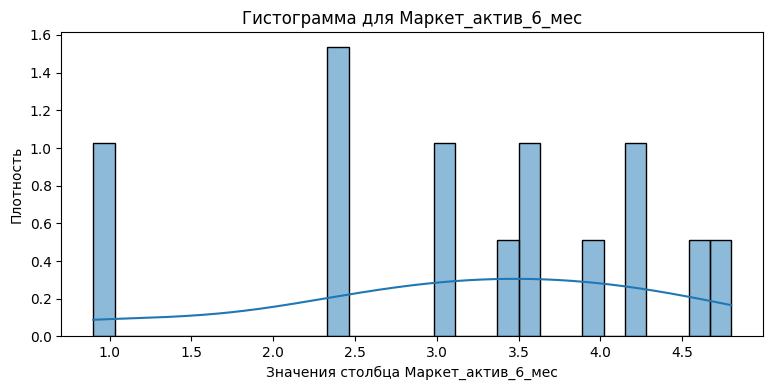

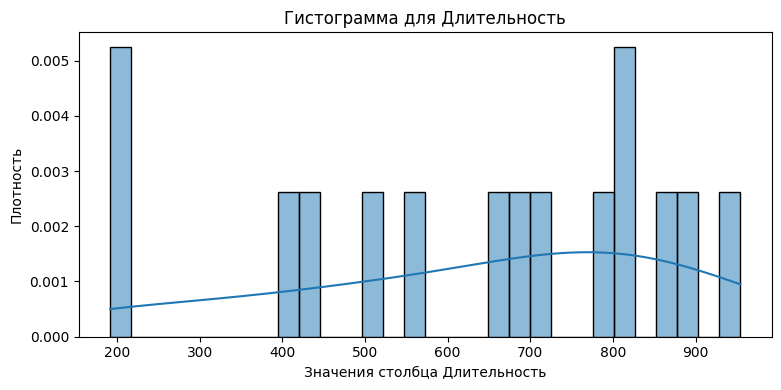

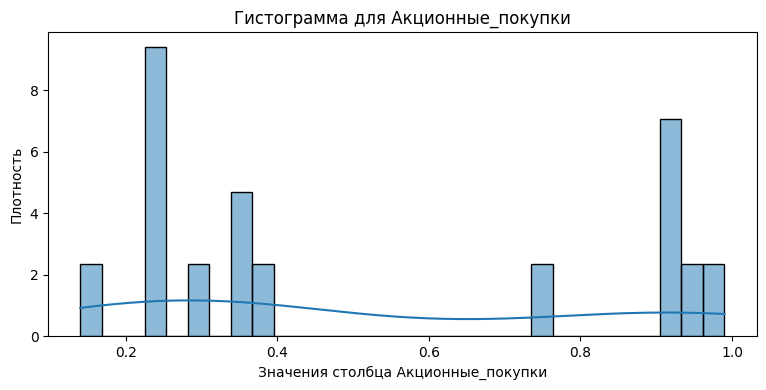

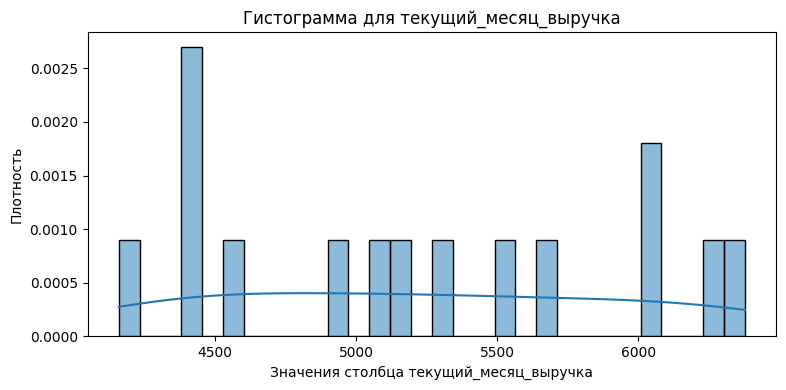

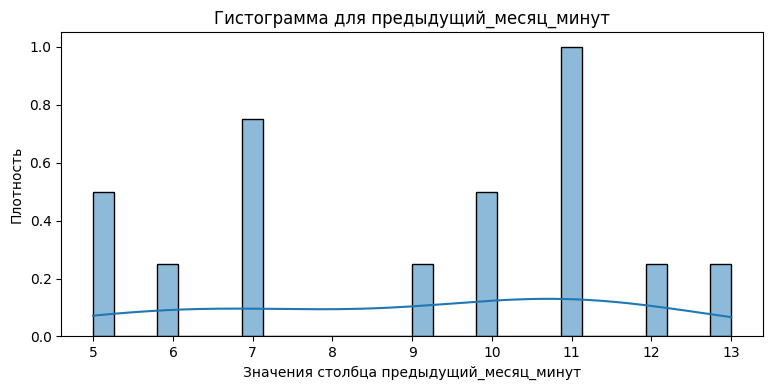

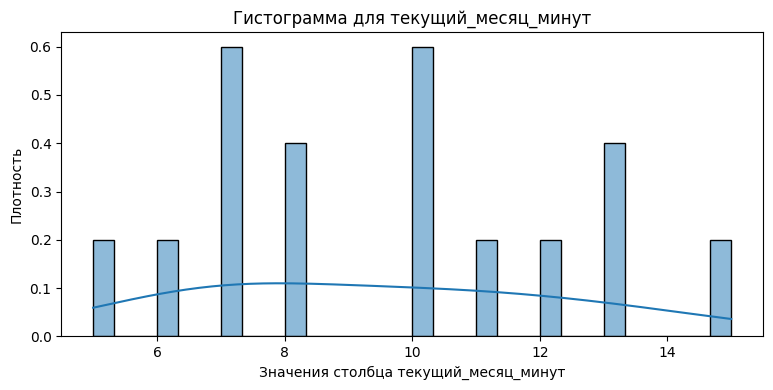

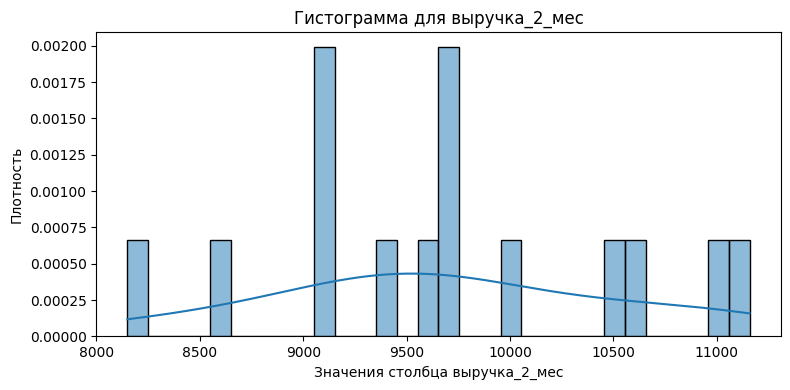

In [77]:
nepr_d(neprerivni)

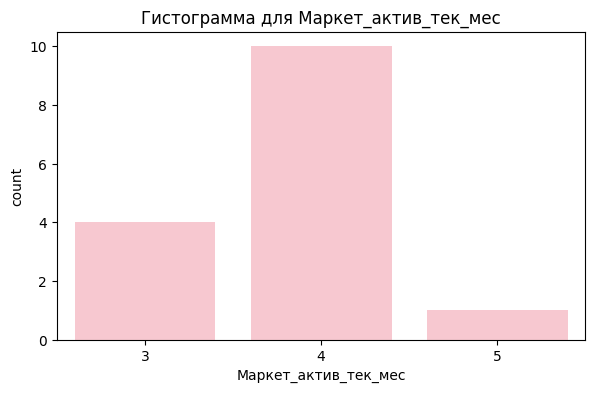

In [78]:
count_di(segment, market_di[0])

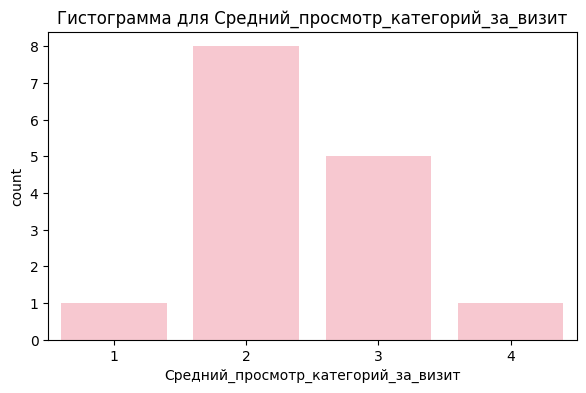

In [79]:
count_di(segment, market_di[1])

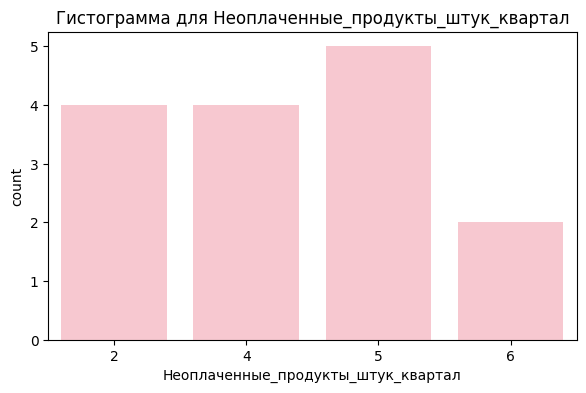

In [80]:
count_di(segment, market_di[2])

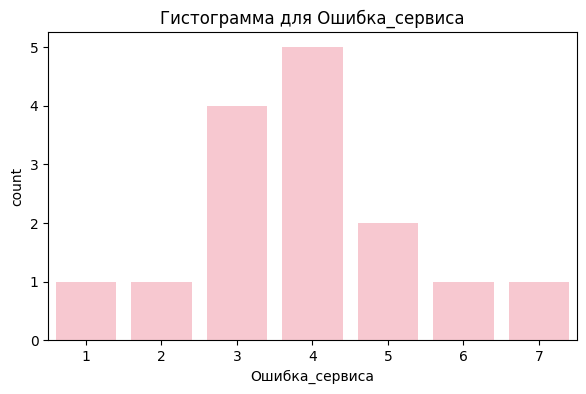

In [81]:
count_di(segment, market_di[3])

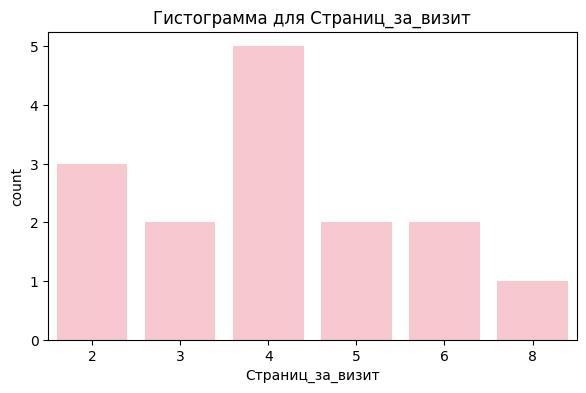

In [82]:
count_di(segment, market_di[4])

**Вывод:**
  * Покупатели, относящиеся к категории **покупаем всё по акции** и демонстрирующие снижение покупательской активности, в основном приобретают товары для детей. 
  * Они почти не рассматривают другие категории при посещении сайта, просматривают меньше страниц и проводят на платформе меньше времени по сравнению с теми покупателями, чья активность осталась неизменной.


Возможно, стоит организовать акции на детские товары и разместить их на первых страницах сайта, чтобы привлечь внимание этих покупателей.

## Общий вывод

Задачей данного иссследования было построение модели, которая бы предсказала уменьшение покупательской активности пользователей интернет-магазина "В один клик".
Другой задачей было исследование выбранного сегмента пользователей.

В рамках исследования были проделаны следующие шаги.

1. Загрузка данных
Исходными данными для исследования были четыре отдельных csv файла:

* с данными о поведении покупателя на сайте, коммуникации с ним и его продуктовом поведении.
* с данными о выручке, которую получает магазин с покупателя за период
* с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода
* данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю Данные были загружены в датафреймы библиотеки pandas.

2. Предобработка данных
Исходные данные оказались хорошего качества, но тем не менее они требовали проведения некоторых работ перед началом анализа. 
* Во-первых приведение типов данных. Некоторые числовые значения были считанны как строковые.
* Во-вторых обработка дублей. Если не учитывать колонку с уникальным идентификатором, то в датасете market_file было найдено 11 дублей. Дубли было решено оставить.
* В-четвертых обработка пропусков. Пропусков в данных не было найдено.

3. Исследовательский анализ данных
На этом этапе были построены диаграммы распределения всех признаков. С помощью графиков были обнаружены и исправлены опечатки в категоральных признаках. Акционные_покупки (т.е. если данные близки к 1, то 100 проц покупок по акции) Распределено на два участка. Имеет бимодальное распределение. Могу сделать предположение, что есть люди, которые берут только акционные товары в магазине и их существенное количество. Тут же было выделен выброс в категории Выручка. 
4. Корреляционный анализ данных
Целевым признаком является Покупательская_активность и вот список полей, которые имеют хоть корреляцию с ним: Маркет_актив_6_мес, Акционные_покупки, Средний_просмотр_категорий_за_визит, Неоплаченные_продукты_штук_квартал, Страниц_за_визит, Выручка_препредыдущий_месяц, минут_предыдущий_месяц, минут_текущий_месяц.
Так же график показал сильную зависимость между целевым признаком и id так что в дальнейшем при подготовке данных к обучению модели признак идентификатор был удален. 

5. Объеденение таблиц
Датасеты market_file, market_money, market_time были объеденены в один датафрейм.

7. Обучение модели
С использованием пайпланов из библиотеки sklearn были обучены модели KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC(). При обучении моделей средстави пайплана преебирались некоторое количество гиперпараметров моделей с целью нахождения модели, которая даст лучший результат.
По результатам обучения лучшей стала модель LogisticRegressionC=1, penalty='l1', random_state=42,solver='liblinear'))])
Метрика лучшей модели на тренировочной выборке: 0.8982943861216588 для тестовой 0.89. Удивительно, но значения метрики имеют такой низкий разброс.

8. Анализ важности признаков
Если коротко, то самыми важными оказались признаки Feature 0  и Feature 7.

9. Сегментация пользователей
 * Покупатели, относящиеся к категории **Товары для детей** и демонстрирующие снижение покупательской активности, в основном приобретают товары по акциям. 
  * Они почти не рассматривают другие категории при посещении сайта, просматривают меньше страниц и проводят на платформе меньше времени по сравнению с теми покупателями, чья активность осталась неизменной.

Что касается месячной выручки, то два месяца назад доход от покупателей с низкой активностью был ниже, чем от тех, кто сохранял прежний уровень активности. Однако в прошлом и текущем месяце выручка у них примерно одинаковая, как и прибыль.

Возможно, стоит организовать акции на детские товары и разместить их на первых страницах сайта, чтобы привлечь внимание этих покупателей.